# Objetivo:
- Lidar com Missing Values
- Excluir Atributos e Instâncias com muitos missing values


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

---

In [40]:
df = pd.read_csv("../../Database/102_Database.csv", encoding='utf-8')

## Pegando a porcentagem de missing values para os Atributos

In [41]:
missingValuesColumns = df.isna().sum()

In [42]:
missingValuesColumnsPercentage = missingValuesColumns / df.shape[0]

In [43]:
missingValuesColumnsPercentage.sort_values(ascending=False, inplace=True)

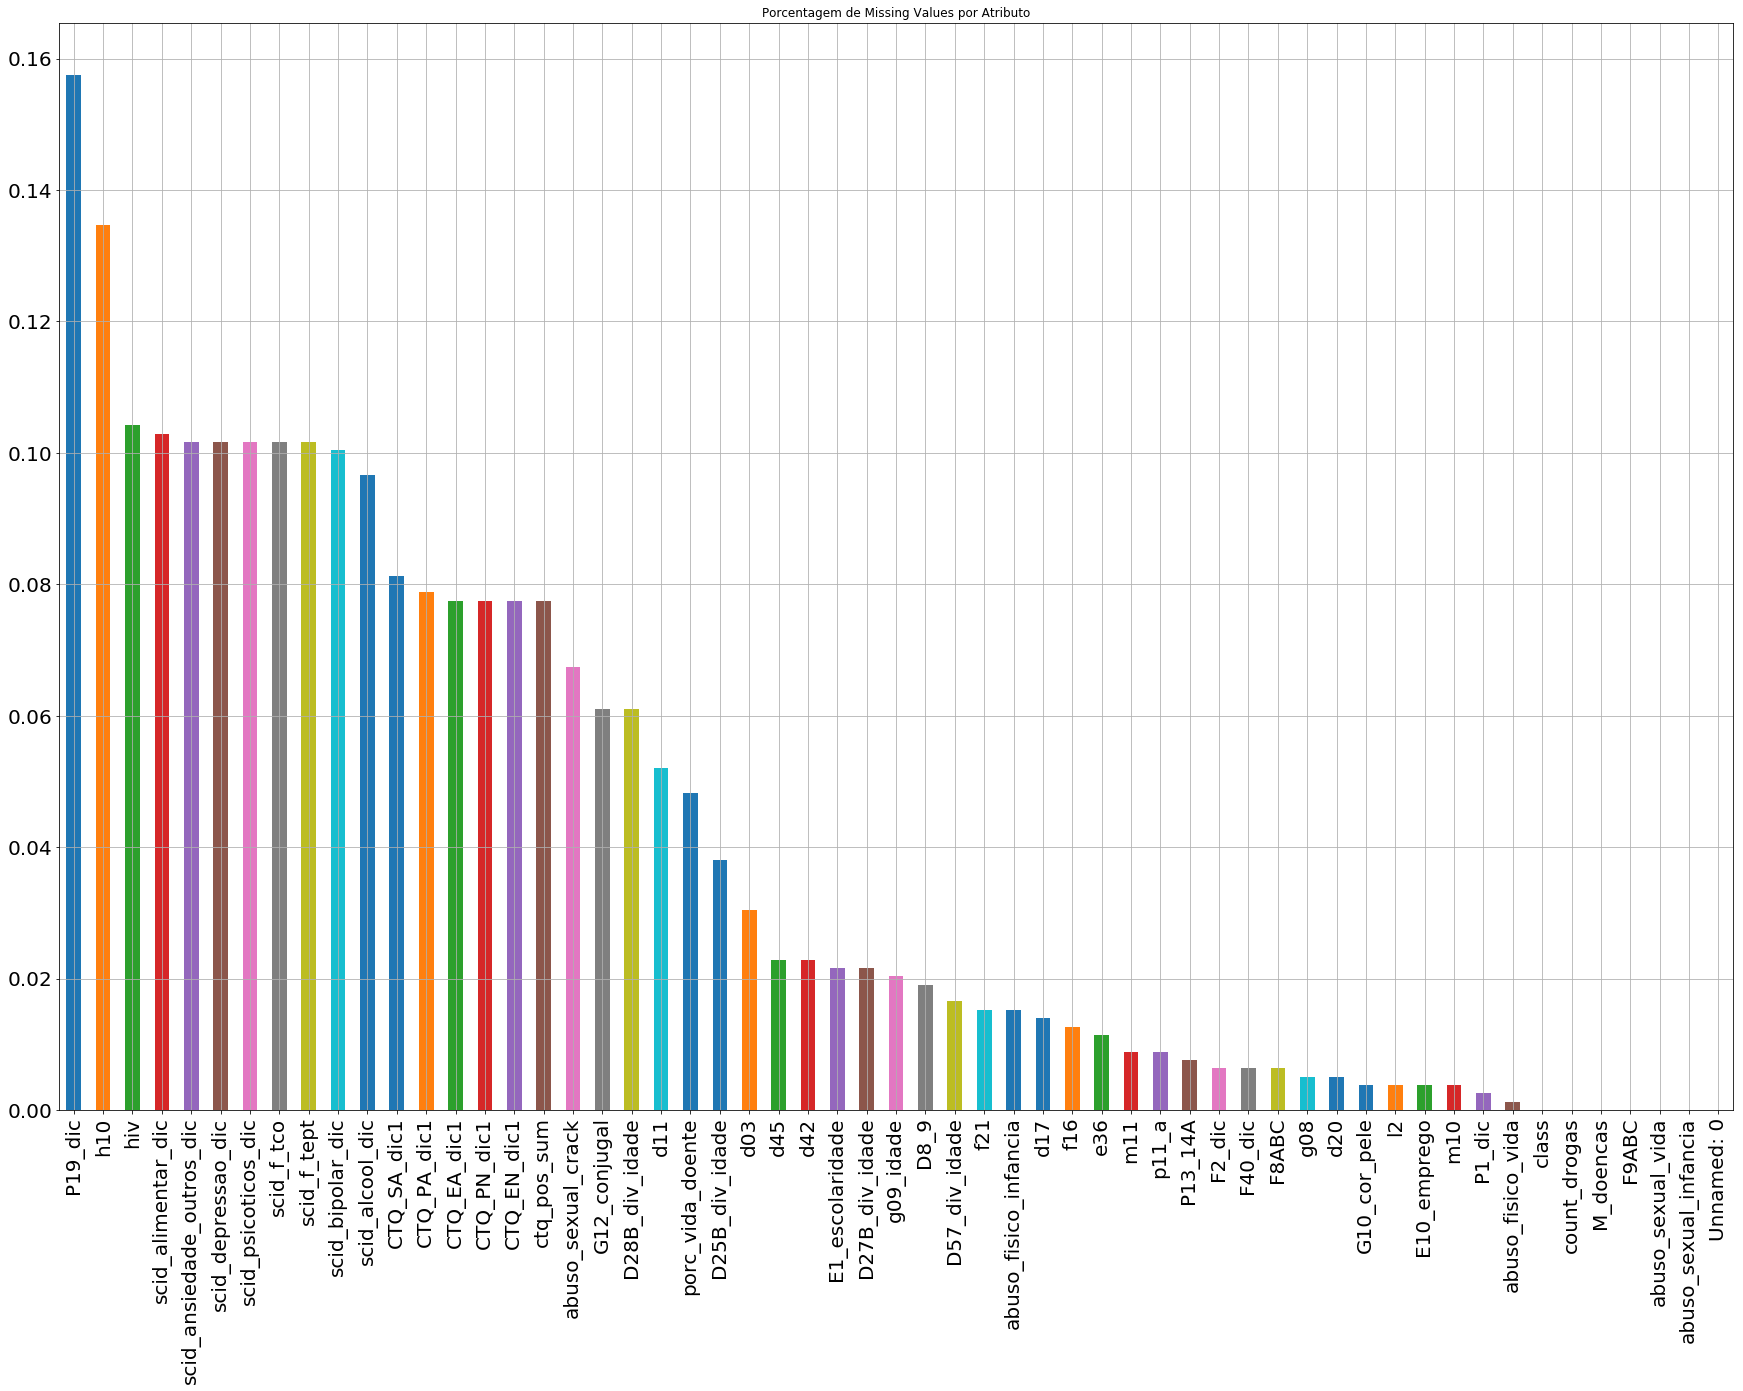

In [44]:
missingValuesColumnsPercentage.plot(kind = 'bar', 
                                    fontsize = (20), 
                                    figsize = (30,20), 
                                    title = "Porcentagem de Missing Values por Atributo",
                                    grid = True)

### Excluindo atributos
##### Regra: Excluir atributos com mais de 10% de missing value
- Atributos com mais missing values:

| Atributo | % Missing Value |                                                                                                                                                                                                              |
|-------         |-------|
|L6_dic          | 87% |
|D29B_div_idade  | 21% |
|D26B_div_idade  | 19% |
|h10             | 14% |
|hiv             | 11% |
|CTQ_PN_dic2     | 11% |
|CTQ_EN_dic2     | 11% |



In [45]:
missingValuesColumnsPercentage

P19_dic                      0.157560
h10                          0.134689
hiv                          0.104193
scid_alimentar_dic           0.102922
scid_ansiedade_outros_dic    0.101652
scid_depressao_dic           0.101652
scid_psicoticos_dic          0.101652
scid_f_tco                   0.101652
scid_f_tept                  0.101652
scid_bipolar_dic             0.100381
scid_alcool_dic              0.096569
CTQ_SA_dic1                  0.081321
CTQ_PA_dic1                  0.078780
CTQ_EA_dic1                  0.077510
CTQ_PN_dic1                  0.077510
CTQ_EN_dic1                  0.077510
ctq_pos_sum                  0.077510
abuso_sexual_crack           0.067344
G12_conjugal                 0.060991
D28B_div_idade               0.060991
d11                          0.052097
porc_vida_doente             0.048285
D25B_div_idade               0.038119
d03                          0.030496
d45                          0.022872
d42                          0.022872
E1_escolarid

In [55]:
df.head(2)

,g08,hiv,m10,m11,e36,d17,d20,count_drogas,d42,d45,...,scid_f_tept,scid_f_tco,scid_psicoticos_dic,scid_depressao_dic,scid_bipolar_dic,scid_alcool_dic,scid_alimentar_dic,scid_ansiedade_outros_dic,ctq_pos_sum,class
1,Masculino,NaN,No,No,Yes,No,No,5,No,No,...,Ausente,Ausente,Ausente,Ausente,Ausente,Ausente,Ausente,Presente,15.0,Nao
2,NaN,NaN,Yes,Yes,Yes,Nao bebe ha 6 meses,No,8,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,Yes


In [46]:
columns_to_drop = ['Unnamed: 0', 'P19_dic', 'h10']
df.drop(columns=columns_to_drop, inplace=True)

---

## Pegando a porcentagem de missing values para as Instâncias

In [47]:
missingValuesLines = df.isna().sum(axis=1)

In [48]:
missingValuesLinesPercentage = missingValuesLines/df.shape[1]

In [49]:
missingValuesLinesPercentage.sort_values(ascending=False, inplace=True)

### Excluindo atributos
##### Regra: Excluir instâncias com mais de 20% de missing value
- (Mantém na base apenas pessoas que responderam pelo menos 80% do formulário)

- Quantidade: 41/857 (4.8%)

In [50]:
len(missingValuesLinesPercentage[missingValuesLinesPercentage > 0.20])

39

In [51]:
missingValuesLinesPercentageDeleted = missingValuesLinesPercentage[missingValuesLinesPercentage > 0.20]

In [52]:
missingValuesLinesPercentageDeleted.index

Int64Index([785, 146, 164, 254,  18, 781, 187, 776, 786,   7,  84, 158, 260,
            281,   0, 777, 312, 778, 126, 127, 264, 138, 140,  93,  87, 780,
             15, 157,  24, 161, 784,  47, 733, 702, 153, 162, 196,  62,  70],
           dtype='int64')

In [53]:
df.drop(df.index[missingValuesLinesPercentageDeleted.index], inplace=True)

----

-----

### Gravando em um novo Database

In [56]:
df.to_csv("../../Database/202_Database.csv", index=False, encoding='utf-8')

---